# Recapitualzation of Trefethen `p27.m` in python

```
% p27.m - Solve KdV eq. u_t + uu_x + u_xxx = 0 on [-pi,pi] by
%         FFT with integrating factor v = exp(-ik^3t)*u-hat.

% Set up grid and two-soliton initial data:
  N = 256; dt = .4/N^2; x = (2*pi/N)*(-N/2:N/2-1)';
  A = 25; B = 16; clf, drawnow, set(gcf,'renderer','zbuffer')
  u = 3*A^2*sech(.5*(A*(x+2))).^2 + 3*B^2*sech(.5*(B*(x+1))).^2; 
  v = fft(u); k = [0:N/2-1 0 -N/2+1:-1]'; ik3 = 1i*k.^3;

% Solve PDE and plot results:
  tmax = 0.006; nplt = floor((tmax/25)/dt); nmax = round(tmax/dt);
  udata = u; tdata = 0; h = waitbar(0,'please wait...');
  for n = 1:nmax
    t = n*dt; g = -.5i*dt*k;
    E = exp(dt*ik3/2); E2 = E.^2;
    a = g.*fft(real( ifft(     v    ) ).^2);
    b = g.*fft(real( ifft(E.*(v+a/2)) ).^2);     % 4th-order
    c = g.*fft(real( ifft(E.*v + b/2) ).^2);     % Runge-Kutta
    d = g.*fft(real( ifft(E2.*v+E.*c) ).^2);
    v = E2.*v + (E2.*a + 2*E.*(b+c) + d)/6;
    if mod(n,nplt) == 0 
      u = real(ifft(v)); waitbar(n/nmax)
      udata = [udata u]; tdata = [tdata t];
    end
  end
  waterfall(x,tdata,udata'), colormap(1e-6*[1 1 1]); view(-20,25)
  xlabel x, ylabel t, axis([-pi pi 0 tmax 0 2000]), grid off
  set(gca,'ztick',[0 2000]), close(h), pbaspect([1 1 .13])
```

See code:
https://hackmd.io/@NCTUIAM5804/r1sIFj8c8


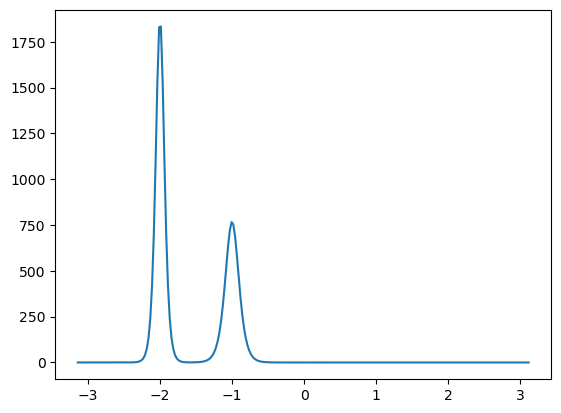

983 6.103515625e-06


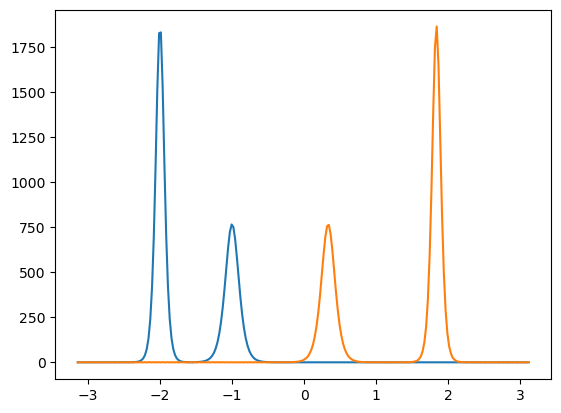

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# gridding
N = 256
dt = 0.4/N**2
x = (2*np.pi/N)*np.arange(-N/2,N/2)
k = np.concatenate((np.arange(N/2) , np.array([0]) , np.arange(-N/2+1,0)))

# IC
A = 25.0
B = 16.0
u = 3.0*(A**2)*(np.cosh(0.5*(A*(x+2))))**(-2) + 3.0*(B**2.0)*(np.cosh(0.5*(B*(x+1))))**(-2)
v = np.fft.fft(u)
ik3 = 1j*k**3

# plot ic
plt.plot(x, u)
plt.show()

# Solve PDE and plot results:

tmax = 0.006; 
nplt = np.floor(tmax/25/dt)
nmax = round(tmax/dt)

udata = [u] 
tdata = [0.0]

print(nmax, dt)

for n in range(1,nmax+1):
    t = n*dt
    g = -0.5j*dt*k
    E = np.exp(dt*ik3/2.0)
    E2 = E**2
    a = g*np.fft.fft((np.fft.ifft(v).real)**2)
    b = g*np.fft.fft((np.fft.ifft(E*(v+a/2)).real)**2)     
    c = g*np.fft.fft((np.fft.ifft(E*v+b/2).real)**2)
    d = g*np.fft.fft((np.fft.ifft(E2*v+E*c).real)**2)
    v = E2*v + (E2*a + 2*E*(b+c) + d)/6 #RK4 update
    if n % nplt == 0: 
      u = np.fft.ifft(v).real
      udata += [u]
      tdata += [t]

# plot initial and final
plt.plot(x,udata[0])
plt.plot(x,udata[-1])
plt.show()

In [102]:
N = 512
x = (2*np.pi/N)*np.arange(-N/2,N/2)
print(x.shape)
print(x)

(512,)
[-3.14159265 -3.12932081 -3.11704896 -3.10477711 -3.09250527 -3.08023342
 -3.06796158 -3.05568973 -3.04341788 -3.03114604 -3.01887419 -3.00660234
 -2.9943305  -2.98205865 -2.96978681 -2.95751496 -2.94524311 -2.93297127
 -2.92069942 -2.90842757 -2.89615573 -2.88388388 -2.87161203 -2.85934019
 -2.84706834 -2.8347965  -2.82252465 -2.8102528  -2.79798096 -2.78570911
 -2.77343726 -2.76116542 -2.74889357 -2.73662173 -2.72434988 -2.71207803
 -2.69980619 -2.68753434 -2.67526249 -2.66299065 -2.6507188  -2.63844696
 -2.62617511 -2.61390326 -2.60163142 -2.58935957 -2.57708772 -2.56481588
 -2.55254403 -2.54027218 -2.52800034 -2.51572849 -2.50345665 -2.4911848
 -2.47891295 -2.46664111 -2.45436926 -2.44209741 -2.42982557 -2.41755372
 -2.40528188 -2.39301003 -2.38073818 -2.36846634 -2.35619449 -2.34392264
 -2.3316508  -2.31937895 -2.3071071  -2.29483526 -2.28256341 -2.27029157
 -2.25801972 -2.24574787 -2.23347603 -2.22120418 -2.20893233 -2.19666049
 -2.18438864 -2.1721168  -2.15984495 -2.14757

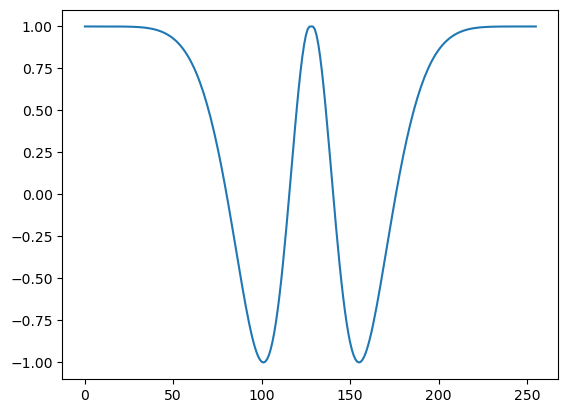

In [114]:
plt.plot(np.exp(ik3*dt/2.0).real)